# Horizontal Wind Divergence Tutorial
*Created by Cait Roufa for NIU Data Science in the Geosciences - 2025*

This tutorial uses Cartopy to plot wind barbs and horizontal wind divergence calculated from ERA5 data of u and v winds at any chosen pressure level.

In [2]:
# import packages for xarray, metpy calculations, and cartopy and matplotlib for plotting

import xarray as xr
import numpy as np
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
from matplotlib import colors
import cartopy as cp
import cartopy.crs as ccrs

### Find and Import Data
Data for this tutorial comes from ERA5 U and V winds on vertical pressure levels: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-pressure-levels?tab=overview. Divergence data is available; however, we want to try to calculate this for fun. 6-hourly u and v wind data were downloaded for a full year (2023) for an existing project. We recommend, just downloading a single timestep (1 date at one hour) due to file sizes and download times.

In [3]:
# import u and v wind ERA5 data using xarray

ds_u = xr.open_dataset('/home/scratch/croufa/era5/era5.2023.u.nc')
ds_v = xr.open_dataset('/home/scratch/croufa/era5/era5.2023.v.nc')

# print out each dataset to ensure that they contain the information you expect
ds_u

/home/croufa/.local/lib/python3.9/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.26.0
  warnings.warn(


<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 37, time: 120)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2023-04-01 ... 2023-04-30T18:00:00
Data variables:
    u          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-17 03:10:23 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

### Select Data
If you did not download a single timestep and you have a much larger dataset, you will need to select a single time as shown here, or you can do a mean over the time dimension if you would like to plot a climatological or other period mean. The .sel() function allows you to select values in the dataset by some chosen dimension.

We use the same .sel() function to select a single pressure level to plot. If the level is set with a specific variable, it can be used in titles later without having to remember to change these values in your title names every time. You can play with the pressure level to look at upper level winds or lower level winds.

In [4]:
# set a specific pressure level
set_level = 300

# set u and v variables equal to our datasets selected by one timestep and one level
u = ds_u['u'].sel(time='2023-04-1T00:00:00.000000000').sel(level=set_level)
v = ds_v['v'].sel(time='2023-04-1T00:00:00.000000000').sel(level=set_level)

# print out the data array information to ensure everything looks as it should
u

<xarray.DataArray 'u' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      int32 300
    time       datetime64[ns] 2023-04-01
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind

### Calculate Divergence
Horizontal wind divergence is the gradient of the wind. Fortunately, there is a nice divergence function within the MetPy library, so you do not need to make a custom function. This function takes u and v winds as the first two default arguments. You will input the name of your u and v wind variables in that order within the function.

In [5]:
# metpy divergence function takes the u and v winds as arguments

wind_div = mpcalc.divergence(u, v)

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/pint/quantity.py:1313: RuntimeWarning: invalid value encountered in divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


### Cartopy Plotting
To plot our divergence field and wind barbs, we need to create a Cartopy basemap by adding a projection and features.

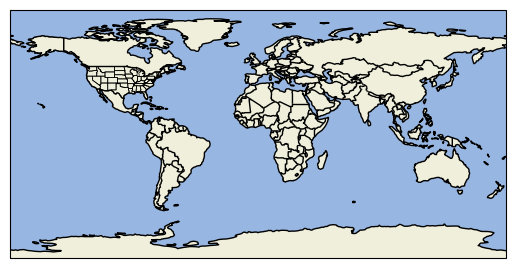

In [6]:
# defines projection of the basemap
ax = plt.axes(projection=ccrs.PlateCarree())

# adds features to the basemap, including: land surfaces, ocean, coastlines, country borders, and US states
ax.add_feature(cp.feature.LAND)
ax.add_feature(cp.feature.OCEAN)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.STATES, linewidth=0.5)

# displays the plot
plt.show()

### Plot the Divergence
Next we plot our calculated divergence over this basemap. We need to define the latitude and longitude of the plot, so it will be easy to call out the longitude and latitude values within one of our wind datasets: u.longitude and u.latitude. We also need to have a color bar with a label by using plt.colorbar(). A divergent colorbar would be idea for this situation given that we are looking at divergence / convergence, so we can set that using cmap and CenteredNorm.

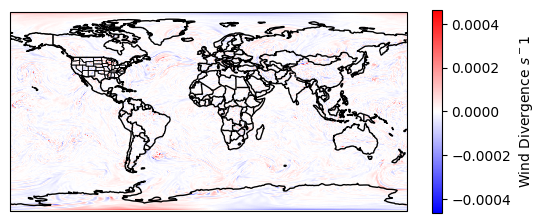

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cp.feature.LAND)
ax.add_feature(cp.feature.OCEAN)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.STATES, linewidth=0.5)

# plots wind divergence with lat / lon values from u wind dataset
# sets centered blue to white to red colorbar with a label
c = ax.pcolormesh(u.longitude, u.latitude, wind_div, norm=colors.CenteredNorm(), cmap='bwr')
plt.colorbar(c, label=r'Wind Divergence $s^-1$', shrink=0.55) # make a colorbar, label it, and shrink it to fit next to the image

plt.show()

### Set Extent of Plot
Next we would like to zoom in to one area of our plot to look closely at the divergence field in a smaller region. We'll use set_extent() to set longitude followed by latitude values, and need to define our projection as well. The date for this sample dataset is 4.1.2023 00Z, when a strong storm system moved through the midwest. So we will set latitude and longitude bounds to focus on this area.

We can also set a title using r and f strings to use LaTeX functions for the units and the set_level variable for automatically naming our plot based on the chosen pressure level.

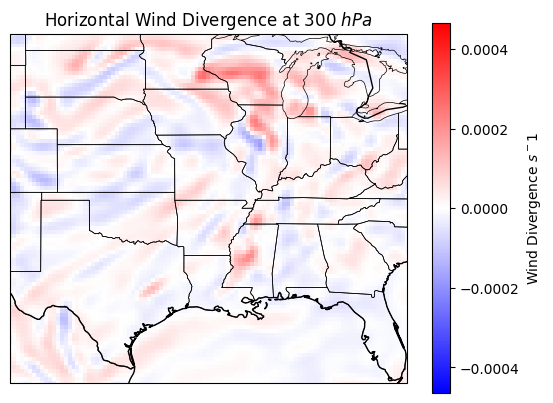

In [7]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cp.feature.LAND)
ax.add_feature(cp.feature.OCEAN)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.STATES, linewidth=0.5)

c = ax.pcolormesh(u.longitude, u.latitude, wind_div, norm=colors.CenteredNorm(), cmap='bwr')
plt.colorbar(c, label=r'Wind Divergence $s^-1$')

# sets the title using r for LaTeX functions to do the units and f string for adding the set_level variable
ax.set_title(rf'Horizontal Wind Divergence at {set_level} $hPa$')

# sets the extent of the map to zoom in on the Midwest US
ax.set_extent([-80, -105, 25, 47], crs=ccrs.PlateCarree())

plt.show()

### Plot Windbarbs
Now we want to plot the windbarbs over the divergence field. Matplotlib has a barbs function that takes the longitude, latitude, u, and v winds as arguments in that order. We'll use the lat lon values from the u wind dataset again and just call u and v for our winds. Note that if you run this plot as is, the entire plot will be filled with wind barbs, since the grid is too dense at this scale to appropriately show the barbs.

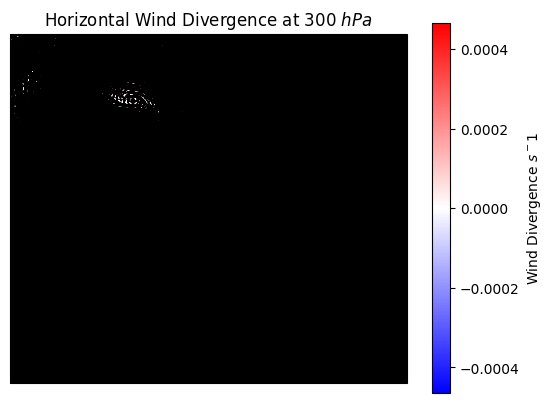

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cp.feature.LAND)
ax.add_feature(cp.feature.OCEAN)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.STATES, linewidth=0.5)

c = ax.pcolormesh(u.longitude, u.latitude, wind_div, norm=colors.CenteredNorm(), cmap='bwr')
plt.colorbar(c, label=r'Wind Divergence $s^-1$')

ax.set_title(rf'Horizontal Wind Divergence at {set_level} $hPa$')
ax.set_extent([-80, -105, 25, 47], crs=ccrs.PlateCarree())

# plots wind barbs
plt.barbs(u.longitude, u.latitude, u, v)

plt.show()

### Fix Windbarb Density
We can fix the windbarb density by skipping every blank interval. We can set a skip variable to play with, and then skip by that interval for the latitude, longitude, u, and v wind.

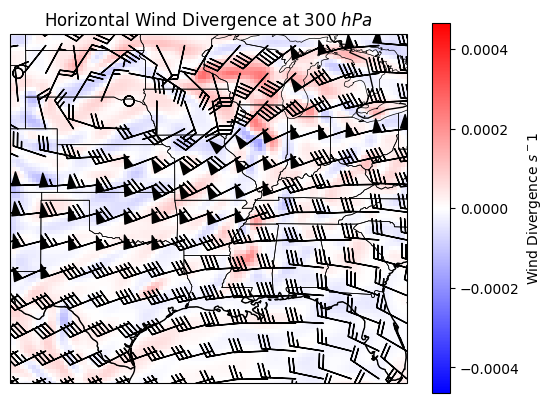

In [9]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cp.feature.LAND)
ax.add_feature(cp.feature.OCEAN)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.STATES, linewidth=0.5)

c = ax.pcolormesh(u.longitude, u.latitude, wind_div, norm=colors.CenteredNorm(), cmap='bwr')
plt.colorbar(c, label=r'Wind Divergence $s^-1$')

ax.set_title(rf'Horizontal Wind Divergence at {set_level} $hPa$')
ax.set_extent([-80, -105, 25, 47], crs=ccrs.PlateCarree())

skip = 7
plt.barbs(u.longitude[::skip], u.latitude[::skip], u[::skip, ::skip], v[::skip, ::skip])

plt.show()